In [1]:
import requests
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import linregress
import os

In [21]:
# api url
url = 'https://stats.nba.com/stats/leaguedashplayerstats?College=&Conference=&Country=&DateFrom=&DateTo=&Division=&DraftPick=&DraftYear=&GameScope=&GameSegment=&Height=&LastNGames=0&LeagueID=00&Location=&MeasureType=Base&Month=0&OpponentTeamID=0&Outcome=&PORound=0&PaceAdjust=N&PerMode=PerGame&Period=0&PlayerExperience=&PlayerPosition=&PlusMinus=N&Rank=N&Season=2019-20&SeasonSegment=&SeasonType=Regular+Season&ShotClockRange=&StarterBench=&TeamID=0&TwoWay=0&VsConference=&VsDivision=&Weight='

# headers I read in api documentation that I need to include
headers = {
    'User-Agent':'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/80.0.3987.42 Safari/537.36',
    'x-nba-stats-origin': 'stats',
}

# extracts data from api
response = requests.get(url,headers=headers).json()
# find the amount of records available in api (number of players they have stats for)
num_records = len(response['resultSets'][0]['rowSet'])
# extracts the headers of each dictionary item, which will be used to name the columns
column_headers = response['resultSets'][0]['headers']
# creates a df where the index goes up to the amount records available, and the column headers are the headers that were listed in the dictionary
stats_df = pd.DataFrame(index = np.arange(num_records), columns = column_headers)

# goes through each record/player available
for player_index in range(0, num_records):
# saves the path to get to each record/player to a variable
    records = response['resultSets'][0]['rowSet'][player_index]
# within each player's dictionary, interrate through each of their stats
    for stat in range(0, len(records)):
# adds each stat value into a df for each stat for each player
    stats_df.iloc[[player_index],[stat]] = records[stat]

stats_df


,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,...,BLKA_RANK,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS
0,203932,Aaron Gordon,1610612753,ORL,24,58,28,30,0.483,33,...,83,194,62,95,359,65,28,16,5,"203932,1610612753"
1,1628988,Aaron Holiday,1610612754,IND,23,58,36,22,0.621,23.6,...,190,251,177,189,140,214,136,28,5,"1628988,1610612754"
2,1627846,Abdel Nader,1610612760,OKC,26,48,33,15,0.688,15.8,...,362,343,315,298,330,345,226,28,5,"1627846,1610612760"
3,1629690,Adam Mokoka,1610612741,CHI,21,11,3,8,0.273,10.2,...,213,301,445,418,35,438,226,28,5,"1629690,1610612741"
4,1629678,Admiral Schofield,1610612764,WAS,23,27,9,18,0.333,10.8,...,389,307,409,414,334,429,226,28,5,"1629678,1610612764"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,203897,Zach LaVine,1610612741,CHI,25,60,20,40,0.333,34.8,...,4,157,34,14,433,29,136,28,5,"203897,1610612741"
510,1629668,Zach Norvell Jr.,1610612744,GSW,22,5,2,3,0.4,8.2,...,460,433,472,443,495,447,226,28,5,"1629668,1610612744"
511,1629015,Zhaire Smith,1610612755,PHI,20,7,3,4,0.429,4.6,...,392,455,461,480,345,482,226,28,5,"1629015,1610612755"
512,1629627,Zion Williamson,1610612740,NOP,19,19,10,9,0.526,29.7,...,2,265,11,18,15,43,136,28,5,"1629627,1610612740"


In [10]:
# saves df to csv
output_data_file = "nba.csv"
stats_df.to_csv(output_data_file)


In [2]:
# saves csv to df so I don't have to run above cells every time
file_path5 = os.path.join("Output csv's", "nba api.csv")
statscsv_df = pd.read_csv(file_path5)
# calculates "ability score", which we made up- the total points, assists, rebound, bloucks, double-doubles, and triple-doubles per game for each player
statscsv_df["Ability Score"] = statscsv_df["PTS"] + statscsv_df["AST"] + statscsv_df["REB"] + statscsv_df["BLK"] + statscsv_df["DD2"] + statscsv_df["TD3"] + statscsv_df["STL"]
statscsv_df


,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Ability Score
0,0,203932,Aaron Gordon,1610612753,ORL,24.0,58,28,30,0.483,...,194,62,95,359,65,28,16,5,"203932,1610612753",47.2
1,1,1628988,Aaron Holiday,1610612754,IND,23.0,58,36,22,0.621,...,251,177,189,140,214,136,28,5,"1628988,1610612754",18.0
2,2,1627846,Abdel Nader,1610612760,OKC,26.0,48,33,15,0.688,...,343,315,298,330,345,226,28,5,"1627846,1610612760",9.4
3,3,1629690,Adam Mokoka,1610612741,CHI,21.0,11,3,8,0.273,...,301,445,418,35,438,226,28,5,"1629690,1610612741",4.6
4,4,1629678,Admiral Schofield,1610612764,WAS,23.0,27,9,18,0.333,...,307,409,414,334,429,226,28,5,"1629678,1610612764",5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,509,203897,Zach LaVine,1610612741,CHI,25.0,60,20,40,0.333,...,157,34,14,433,29,136,28,5,"203897,1610612741",38.5
510,510,1629668,Zach Norvell Jr.,1610612744,GSW,22.0,5,2,3,0.400,...,433,472,443,495,447,226,28,5,"1629668,1610612744",4.2
511,511,1629015,Zhaire Smith,1610612755,PHI,20.0,7,3,4,0.429,...,455,461,480,345,482,226,28,5,"1629015,1610612755",2.1
512,512,1629627,Zion Williamson,1610612740,NOP,19.0,19,10,9,0.526,...,265,11,18,15,43,136,28,5,"1629627,1610612740",35.9


In [3]:
# sorts rows by ability score- largest to smallest
statscsv_df.sort_values("Ability Score", ascending = False)


,Unnamed: 0,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,...,PF_RANK,PFD_RANK,PTS_RANK,PLUS_MINUS_RANK,NBA_FANTASY_PTS_RANK,DD2_RANK,TD3_RANK,CFID,CFPARAMS,Ability Score
173,173,203507,Giannis Antetokounmpo,1610612749,MIL,25.0,57,48,9,0.842,...,32,1,3,1,1,1,6,5,"203507,1610612749",107.1
315,315,2544,LeBron James,1610612747,LAL,35.0,60,47,13,0.783,...,249,18,13,4,4,6,2,5,"2544,1610612747",100.9
321,321,1629029,Luka Doncic,1610612742,DAL,21.0,54,34,20,0.630,...,91,4,6,30,3,10,1,5,"1629029,1610612742",96.0
129,129,1627734,Domantas Sabonis,1610612754,IND,23.0,62,37,25,0.597,...,27,23,55,85,20,3,6,5,"1627734,1610612754",91.2
382,382,203999,Nikola Jokic,1610612743,DEN,25.0,65,43,22,0.662,...,31,19,36,53,15,7,3,5,"203999,1610612743",90.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,364,1629671,Miye Oni,1610612762,UTA,22.0,5,4,1,0.800,...,500,492,501,442,510,226,28,5,"1629671,1610612762",0.4
491,491,1629724,Vic Law,1610612753,ORL,24.0,5,1,4,0.200,...,500,472,501,263,511,226,28,5,"1629724,1610612753",0.2
273,273,1629625,Justin Wright-Foreman,1610612762,UTA,22.0,1,0,1,0.000,...,500,492,501,108,512,226,28,5,"1629625,1610612762",0.0
196,196,1629122,J.P. Macura,1610612739,CLE,24.0,1,1,0,1.000,...,500,492,501,74,512,226,28,5,"1629122,1610612739",0.0


In [4]:
# function that creates scatter plot, linear regression, and saves figure to computer
def regression(x_values, y_values, x_line_placement, y_line_placement, y_label, title, file_name):
    # Adds the linear regression equation and line to plot
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    #stores regression line
    regress_values = x_values * slope + intercept
    # creates the formula of the line that will appear
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # plots points
    plt.scatter(x_values,y_values)
    # plots regression line, ”r-“ makes the line a continuous
    plt.plot(x_values,regress_values,"r-")
    # makes the formula appear
    plt.annotate(line_eq,(x_line_placement, y_line_placement),fontsize=15,color="red")
    plt.xlabel("Age")
    plt.ylabel(y_label)
    plt.title(title)
    print(f"The r-squared value is: {rvalue**2}")
    plt.savefig("Figures/" + file_name + ".png")
    plt.show()


The r-squared value is: 0.019412764921801898


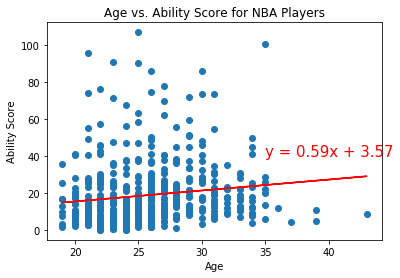

In [6]:
# plots player age vs. ability score by calling function above
regression(statscsv_df["AGE"], statscsv_df["Ability Score"], 35, 40, "Ability Score", "Age vs. Ability Score for NBA Players", "age vs ability score")


The r-squared value is: 0.025533215002047454


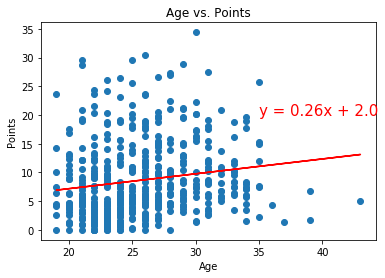

In [20]:
# plots player age vs. points by calling function above
regression(statscsv_df["AGE"], statscsv_df["PTS"], 35, 20, "Points", "Age vs. Points", "age vs points")


The r-squared value is: 0.041139539101903384


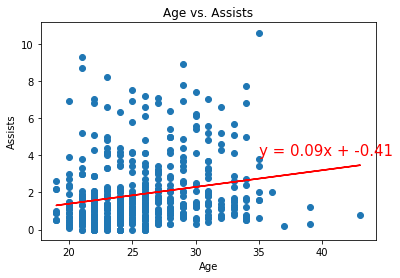

In [22]:
# plots player age vs. assists by calling function above
regression(statscsv_df["AGE"], statscsv_df["AST"], 35, 4, "Assists", "Age vs. Assists", "age vs assists")


The r-squared value is: 0.022228242873968587


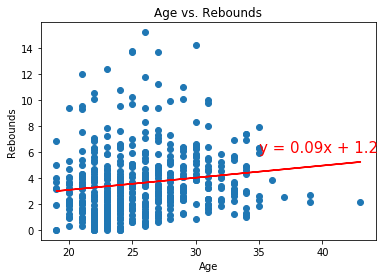

In [24]:
# plots player age vs. rebounds by calling function above
regression(statscsv_df["AGE"], statscsv_df["REB"], 35, 6, "Rebounds", "Age vs. Rebounds", "age vs rebounds")


The r-squared value is: 0.006215385289406767


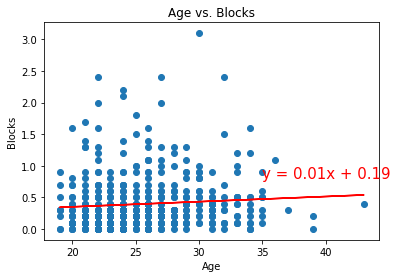

In [27]:
# plots player age vs. blocks by calling function above
regression(statscsv_df["AGE"], statscsv_df["BLK"], 35, .8, "Blocks", "Age vs. Blocks", "age vs blocks")


The r-squared value is: 0.003582352385346332


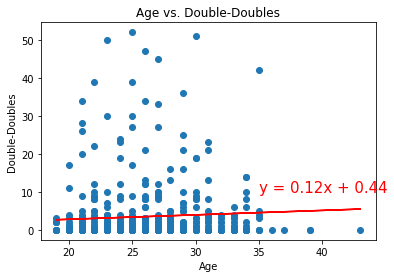

In [29]:
# plots player age vs. DD2 by calling function above
# DD2 = The number of double-doubles (double-digit number total in two of the five categories in a game) a player achieves
regression(statscsv_df["AGE"], statscsv_df["DD2"], 35, 10, "Double-Doubles", "Age vs. Double-Doubles", "age vs dd")


The r-squared value is: 0.0012656247351166526


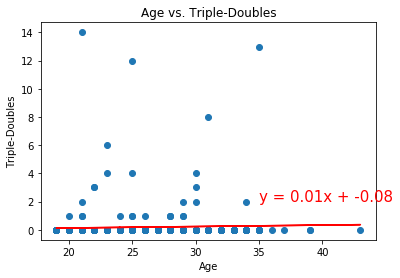

In [31]:
# plots player age vs. TD3 by calling function above
# TD = The number of triple-doubles (double-digit number total in three of the five categories in a game) a player achieves
regression(statscsv_df["AGE"], statscsv_df["TD3"], 35, 2, "Triple-Doubles", "Age vs. Triple-Doubles", "age vs td")


In [3]:
from nba_api.stats.static import players
# get_players returns a list of dictionaries, each representing a player.
nba_players = players.get_players()
print('Number of players fetched: {}'.format(len(nba_players)))
nba_players

Number of players fetched: 4501


[{'id': 76001,
  'full_name': 'Alaa Abdelnaby',
  'first_name': 'Alaa',
  'last_name': 'Abdelnaby',
  'is_active': False},
 {'id': 76002,
  'full_name': 'Zaid Abdul-Aziz',
  'first_name': 'Zaid',
  'last_name': 'Abdul-Aziz',
  'is_active': False},
 {'id': 76003,
  'full_name': 'Kareem Abdul-Jabbar',
  'first_name': 'Kareem',
  'last_name': 'Abdul-Jabbar',
  'is_active': False},
 {'id': 51,
  'full_name': 'Mahmoud Abdul-Rauf',
  'first_name': 'Mahmoud',
  'last_name': 'Abdul-Rauf',
  'is_active': False},
 {'id': 1505,
  'full_name': 'Tariq Abdul-Wahad',
  'first_name': 'Tariq',
  'last_name': 'Abdul-Wahad',
  'is_active': False},
 {'id': 949,
  'full_name': 'Shareef Abdur-Rahim',
  'first_name': 'Shareef',
  'last_name': 'Abdur-Rahim',
  'is_active': False},
 {'id': 76005,
  'full_name': 'Tom Abernethy',
  'first_name': 'Tom',
  'last_name': 'Abernethy',
  'is_active': False},
 {'id': 76006,
  'full_name': 'Forest Able',
  'first_name': 'Forest',
  'last_name': 'Able',
  'is_active': Fa

In [4]:
ids = []

for player in nba_players:
    ids.append(str(player["id"]))

ids

['76001',
 '76002',
 '76003',
 '51',
 '1505',
 '949',
 '76005',
 '76006',
 '76007',
 '203518',
 '101165',
 '76008',
 '76009',
 '76010',
 '203112',
 '76011',
 '76012',
 '200801',
 '1629121',
 '203919',
 '149',
 '203500',
 '912',
 '1628389',
 '1629061',
 '76015',
 '202399',
 '201167',
 '200772',
 '76016',
 '201336',
 '76017',
 '201582',
 '76018',
 '203006',
 '1629152',
 '202374',
 '76019',
 '76020',
 '203128',
 '202332',
 '200746',
 '76021',
 '1626146',
 '724',
 '2042',
 '76022',
 '201570',
 '1629734',
 '2349',
 '1629638',
 '76024',
 '1628959',
 '76028',
 '1628960',
 '1628386',
 '706',
 '1628443',
 '202730',
 '76027',
 '2124',
 '76025',
 '951',
 '2754',
 '76029',
 '200984',
 '76030',
 '201165',
 '308',
 '1747',
 '1824',
 '680',
 '732',
 '202329',
 '200811',
 '76034',
 '2365',
 '2431',
 '101187',
 '202079',
 '76035',
 '76036',
 '1507',
 '76037',
 '944',
 '246',
 '202341',
 '76040',
 '1626147',
 '72',
 '76041',
 '203937',
 '76042',
 '76043',
 '98',
 '76045',
 '76046',
 '201583',
 '1000',
 

In [5]:
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}

for x in ids:
    url2 = 'https://stats.nba.com/stats/commonplayerinfo?LeagueID=00&PlayerID=' + x
    response2 = requests.get(url2,headers=headers).json()
    num_records2 = len(response2["resultSets"][0]["rowSet"])
    fields2 = response2['resultSets'][0]['headers']
    stats_df2 = pd.DataFrame(index = np.arange(num_records2), columns = fields2)
    for i in range(0, num_records2):
        records2 = response2['resultSets'][0]['rowSet'][i]
        for j in range(0, len(records2)):
            stats_df2.iloc[[i],[j]] = records2[j]

stats_df2


ConnectionError: ('Connection aborted.', OSError("(60, 'ETIMEDOUT')",))

In [2]:
headers = {
    'Host': 'stats.nba.com',
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:61.0) Gecko/20100101 Firefox/61.0',
    'Accept': 'application/json, text/plain, */*',
    'Accept-Language': 'en-US,en;q=0.5',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
    'x-nba-stats-origin': 'stats',
    'x-nba-stats-token': 'true'
}

url2 = 'https://stats.nba.com/stats/commonplayerinfo?LeagueID=00&PlayerID=2544'
response2 = requests.get(url2,headers=headers).json()
response2["resultSets"][0]
#     num_records2 = len(response2["resultSets"][0]["rowSet"])
#     fields2 = response2['resultSets'][0]['headers']
#     stats_df2 = pd.DataFrame(index = np.arange(num_records2), columns = fields2)
#     for i in range(0, num_records2):
#         records2 = response2['resultSets'][1]['rowSet'][i]
#         for j in range(0, len(records2)):
#             stats_df2.iloc[[i],[j]] = records2[j]

{'name': 'CommonPlayerInfo',
 'headers': ['PERSON_ID',
  'FIRST_NAME',
  'LAST_NAME',
  'DISPLAY_FIRST_LAST',
  'DISPLAY_LAST_COMMA_FIRST',
  'DISPLAY_FI_LAST',
  'BIRTHDATE',
  'SCHOOL',
  'COUNTRY',
  'LAST_AFFILIATION',
  'HEIGHT',
  'WEIGHT',
  'SEASON_EXP',
  'JERSEY',
  'POSITION',
  'ROSTERSTATUS',
  'TEAM_ID',
  'TEAM_NAME',
  'TEAM_ABBREVIATION',
  'TEAM_CODE',
  'TEAM_CITY',
  'PLAYERCODE',
  'FROM_YEAR',
  'TO_YEAR',
  'DLEAGUE_FLAG',
  'NBA_FLAG',
  'GAMES_PLAYED_FLAG',
  'DRAFT_YEAR',
  'DRAFT_ROUND',
  'DRAFT_NUMBER'],
 'rowSet': [[2544,
   'LeBron',
   'James',
   'LeBron James',
   'James, LeBron',
   'L. James',
   '1984-12-30T00:00:00',
   ' ',
   'USA',
   'St. Vincent-St. Mary HS (OH)/USA',
   '6-9',
   '250',
   16,
   '23',
   'Forward',
   'Active',
   1610612747,
   'Lakers',
   'LAL',
   'lakers',
   'Los Angeles',
   'lebron_james',
   2003,
   2019,
   'N',
   'Y',
   'Y',
   '2003',
   '1',
   '1']]}